# Video Games Sales Analysis

This notebook analyzes the video games sales data. We use the dataset available on Kaggle: [Video Games Sales as at 22 Dec 2016 CSV](https://www.kaggle.com/datasets/xtyscut/video-games-sales-as-at-22-dec-2016csv).

All file paths have been updated to use Kaggle's input system.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Suppress warnings (if needed)
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Define the file path based on Kaggle's data attachment system
data_path = "/kaggle/input/video-games-sales-as-at-22-dec-2016csv/Video_Games_Sales_as_at_22_Dec_2016.csv"

# Load the dataset
df = pd.read_csv(data_path, encoding='ISO-8859-1')  # specify encoding if needed

# Display the first few rows
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


## Data Overview

Below, we display some basic information about the dataset, including the number of rows, columns, and summary statistics.

In [3]:
# Print the shape of the DataFrame
print(f"Dataset shape: {df.shape}")

# Get basic information
df.info()

# Display summary statistics
df.describe(include='all')

Dataset shape: (16719, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
count,16717,16719,16450.000000,16717,16665,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,10015,7590.000000,10096,9950
unique,11562,31,NaN,12,581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96,NaN,1696,8
top,Need for Speed: Most Wanted,PS2,NaN,Action,Electronic Arts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tbd,NaN,Ubisoft,E
freq,12,2161,NaN,3370,1356,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2425,NaN,204,3991
mean,NaN,NaN,2006.487356,NaN,NaN,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,NaN,162.229908,NaN,NaN
std,NaN,NaN,5.878995,NaN,NaN,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,NaN,561.282326,NaN,NaN
min,NaN,NaN,1980.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,NaN,4.000000,NaN,NaN
25%,NaN,NaN,2003.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,NaN,10.000000,NaN,NaN
50%,NaN,NaN,2007.000000,NaN,NaN,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,NaN,24.000000,NaN,NaN
75%,NaN,NaN,2010.000000,NaN,NaN,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,NaN,81.000000,NaN,NaN


## Sales Analysis

Let's perform a basic analysis of the sales data. For example, we can look at the global sales distribution.

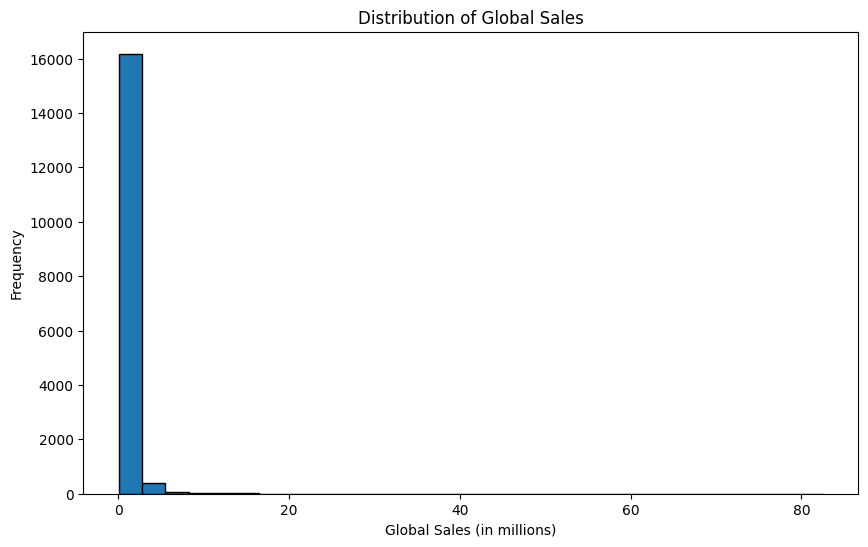

In [4]:
# Check if 'Global_Sales' exists and plot its distribution
if 'Global_Sales' in df.columns:
    plt.figure(figsize=(10, 6))
    plt.hist(df['Global_Sales'].dropna(), bins=30, edgecolor='k')
    plt.title('Distribution of Global Sales')
    plt.xlabel('Global Sales (in millions)')
    plt.ylabel('Frequency')
    plt.show()
else:
    print("Column 'Global_Sales' not found in the dataset.")

## Conclusion

This notebook provides a starting point for analyzing the Video Games Sales dataset. Feel free to extend the analysis by exploring other features or creating more visualizations.